## PANDAS

Una de las librerias más usadas para trabajar con información en Python es PANDAS

¿Ques es Pandas?
- Pandas puede ser visto como matrices con "labels". Puedes pensarlo como una especie de tabla en excel o un dataframe en R
- Es una herramienta muy poderosa para trabajar con gran cantidad de información
- Documentación: http://pandas.pydata.org/pandas-docs/stable/

¿Cuando necesitas trabajar con Pandas?
- Cuando trabajas con información estructurada (como R dataframe, SQL table, Excel spreadsheet, ...)

¿Que puyedes hacer con Pandas?
- Importar data
- Limpiar información
- Explorar información, generar insights de la data
- Preparar la información para desarrollar modelos

In [2]:
import pandas as pd
%matplotlib inline

### Crear un DataFrame

In [3]:
data = {'pais': ['Belgica', 'Francia', 'Alemania', 'Holanda', 'Reino Unido'],
        'poblacion': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Bruselas', 'Paris', 'Berlin', 'Amsterdam', 'Londres']}
df_countries = pd.DataFrame(data)

In [4]:
df_countries

,area,capital,pais,poblacion
0,30510,Bruselas,Belgica,11.3
1,671308,Paris,Francia,64.3
2,357050,Berlin,Alemania,81.3
3,41526,Amsterdam,Holanda,16.9
4,244820,Londres,Reino Unido,64.9


In [9]:
df_ciudades = pd.DataFrame(columns = ['pais','ciudad','capital'])

In [10]:
df_ciudades

,pais,ciudad,capital


In [16]:
df_ciudades['pais'] = ['peru','peru','peru']
df_ciudades['ciudad'] = ['lima','arequipa','trujillo']
df_ciudades['capital'] = ['lima','arequipa','trujillo']

In [17]:
df_ciudades

,pais,ciudad,capital
0,peru,lima,lima
1,peru,arequipa,arequipa
2,peru,trujillo,trujillo


In [5]:
##Crear nuevas variables
pbi = [466,2465,3467,770,2619]


In [7]:
# Crear variables a partir de otras variables

In [ ]:
# Crear subdataframes

### Importar un DataFrame

In [18]:
df_titanic = pd.read_csv("data/titanic.csv")

### Analisis de información

#### Analisis Inicial
- Que variables tiene la data
- Como se ve la data
- Cuanta informacion tiene la data

In [21]:
print list(df_titanic.columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [20]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Analizar las variables en específico

In [28]:
df_titanic['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [27]:
for var in list(df_titanic.columns):
    print '{}: {}'.format(var, df_titanic[var].dtype)

PassengerId: int64
Survived: int64
Pclass: int64
Name: object
Sex: object
Age: float64
SibSp: int64
Parch: int64
Ticket: object
Fare: float64
Cabin: object
Embarked: object


In [29]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

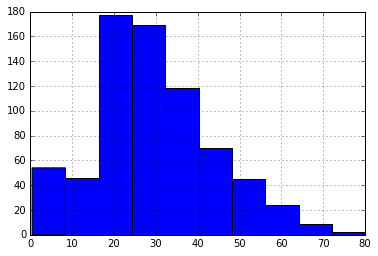

In [33]:
df_titanic['Age'].hist()

In [35]:
df_titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

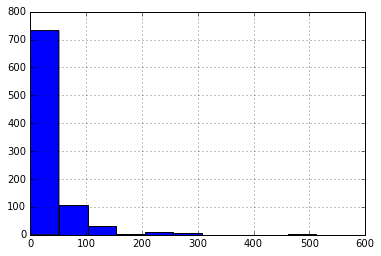

In [36]:
df_titanic['Fare'].hist()

#### Generar algunos insights

In [42]:
# How does the survival rate of the passengers differ between sexes?
df_titanic.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum())
# df_titanic.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,233
male,109


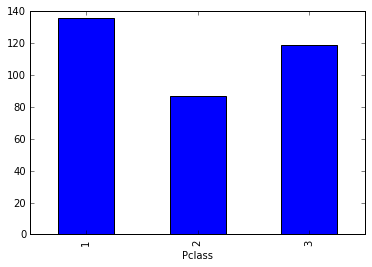

In [43]:
# Or how does it differ between the different classes?
df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum()).plot(kind='bar')
# df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

In [45]:
# Are young people more likely to survive?
df_titanic['Survived'].sum() / df_titanic['Survived'].count()

0L

In [46]:
df25 = df_titanic[df_titanic['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0L